In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, classification_report


In [37]:
header = ["id", "age", "gender", "education", "country", "ethnicity", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "alcohol", "amphet", "amyl", "benzos", "caff", "cannabis", "choc", "coke", "crack", "ecstasy", \
          "heroin", "ketamine", "legallh", "lsd", "meth", "mushroom", "nicotine", "semer", "vsa"]

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", names=header)
df

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness,agreeableness,...,ecstasy,heroin,ketamine,legallh,lsd,meth,mushroom,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [38]:
df_cannabis = df.loc[:,["age", "gender", "education", "country", "neuroticism", "extraversion", \
          "openness", "agreeableness", "conscientiousness", "impulsiveness", "sensation_seeking", \
          "cannabis"]]
# On ne garde pas ethnicity
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL3
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL6
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL6


In [39]:
def CL_to_binary_class(cl):
    if(cl=="CL0" or cl=="CL1" or cl=="CL2"):
        return -1
    else:
        return 1

In [40]:
df_cannabis["cannabis"] = df_cannabis["cannabis"].apply(CL_to_binary_class)
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,-0.07854,-0.48246,1.98437,0.96082,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,0.49788,0.48246,1.98437,0.96082,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,-0.07854,0.48246,0.45468,-0.57009,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,-0.95197,0.48246,-0.61113,-0.57009,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [99]:
gender_name = {-0.48246:"male", 0.48246:"female"}

def rename_gender(x):
    return gender_name[x]

df_cannabis["gender"] = df_cannabis["gender"].apply(rename_gender)
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,female,-0.05921,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,-0.07854,male,1.98437,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,male,-0.05921,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,female,1.16365,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,0.49788,female,1.98437,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,female,-0.61113,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,-0.95197,male,-0.61113,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,-0.07854,female,0.45468,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,-0.95197,female,-0.61113,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [95]:
country_name = {-0.57009:"USA", -0.46841:"New Zealand", -0.28519:"Other", -0.09765:"Australia", 0.21128:"Republic of Ireland", 0.24923:"Canada", 0.96082:"UK"}

def rename_country(x):
    return country_name[x]

df_cannabis["country"] = df_cannabis["country"].apply(rename_country)
df_cannabis

,age,gender,education,country,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,cannabis
0,0.49788,0.48246,-0.05921,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,-1
1,-0.07854,-0.48246,1.98437,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,-1
4,0.49788,0.48246,1.98437,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,USA,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,-0.95197,-0.48246,-0.61113,USA,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,-0.07854,0.48246,0.45468,USA,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,-0.95197,0.48246,-0.61113,USA,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


In [100]:
country = df_cannabis["country"] # on extrait la colonne country
country = np.array(country).reshape(-1, 1) # on reshape sous un format que l'on peut utiliser
enc = OneHotEncoder(handle_unknown='ignore') # on creer le one hot encoder
enc.fit(country) # on fit sur nos données
df_cannabis_encoded = pd.DataFrame(enc.transform(country).toarray(), columns=enc.get_feature_names_out())
df_cannabis_encoded.sum()
# On voit que les deux pays majoritaire sont le Royaume-Unis et les USA


x0_Australia                54.0
x0_Canada                   87.0
x0_New Zealand               5.0
x0_Other                   118.0
x0_Republic of Ireland      20.0
x0_UK                     1044.0
x0_USA                     557.0
dtype: float64

In [101]:
# perform one-hot encoding on categorical features
categorical_features = ['gender', 'country']
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_cannabis[categorical_features])
df_cannabis_encoded = pd.DataFrame(enc.transform(df_cannabis[categorical_features]).toarray(), columns=enc.get_feature_names_out())

# combine the one-hot encoded features with the numerical features
X = pd.concat([df_cannabis.drop(categorical_features, axis=1), df_cannabis_encoded ], axis=1)
y = df_cannabis['cannabis']


In [102]:
X = X.drop("cannabis", axis=1)
X

,age,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation_seeking,gender_female,gender_male,country_Australia,country_Canada,country_New Zealand,country_Other,country_Republic of Ireland,country_UK,country_USA
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
y

0      -1
1       1
2       1
3      -1
4       1
       ..
1880    1
1881    1
1882    1
1883    1
1884    1
Name: cannabis, Length: 1885, dtype: int64

In [127]:

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)

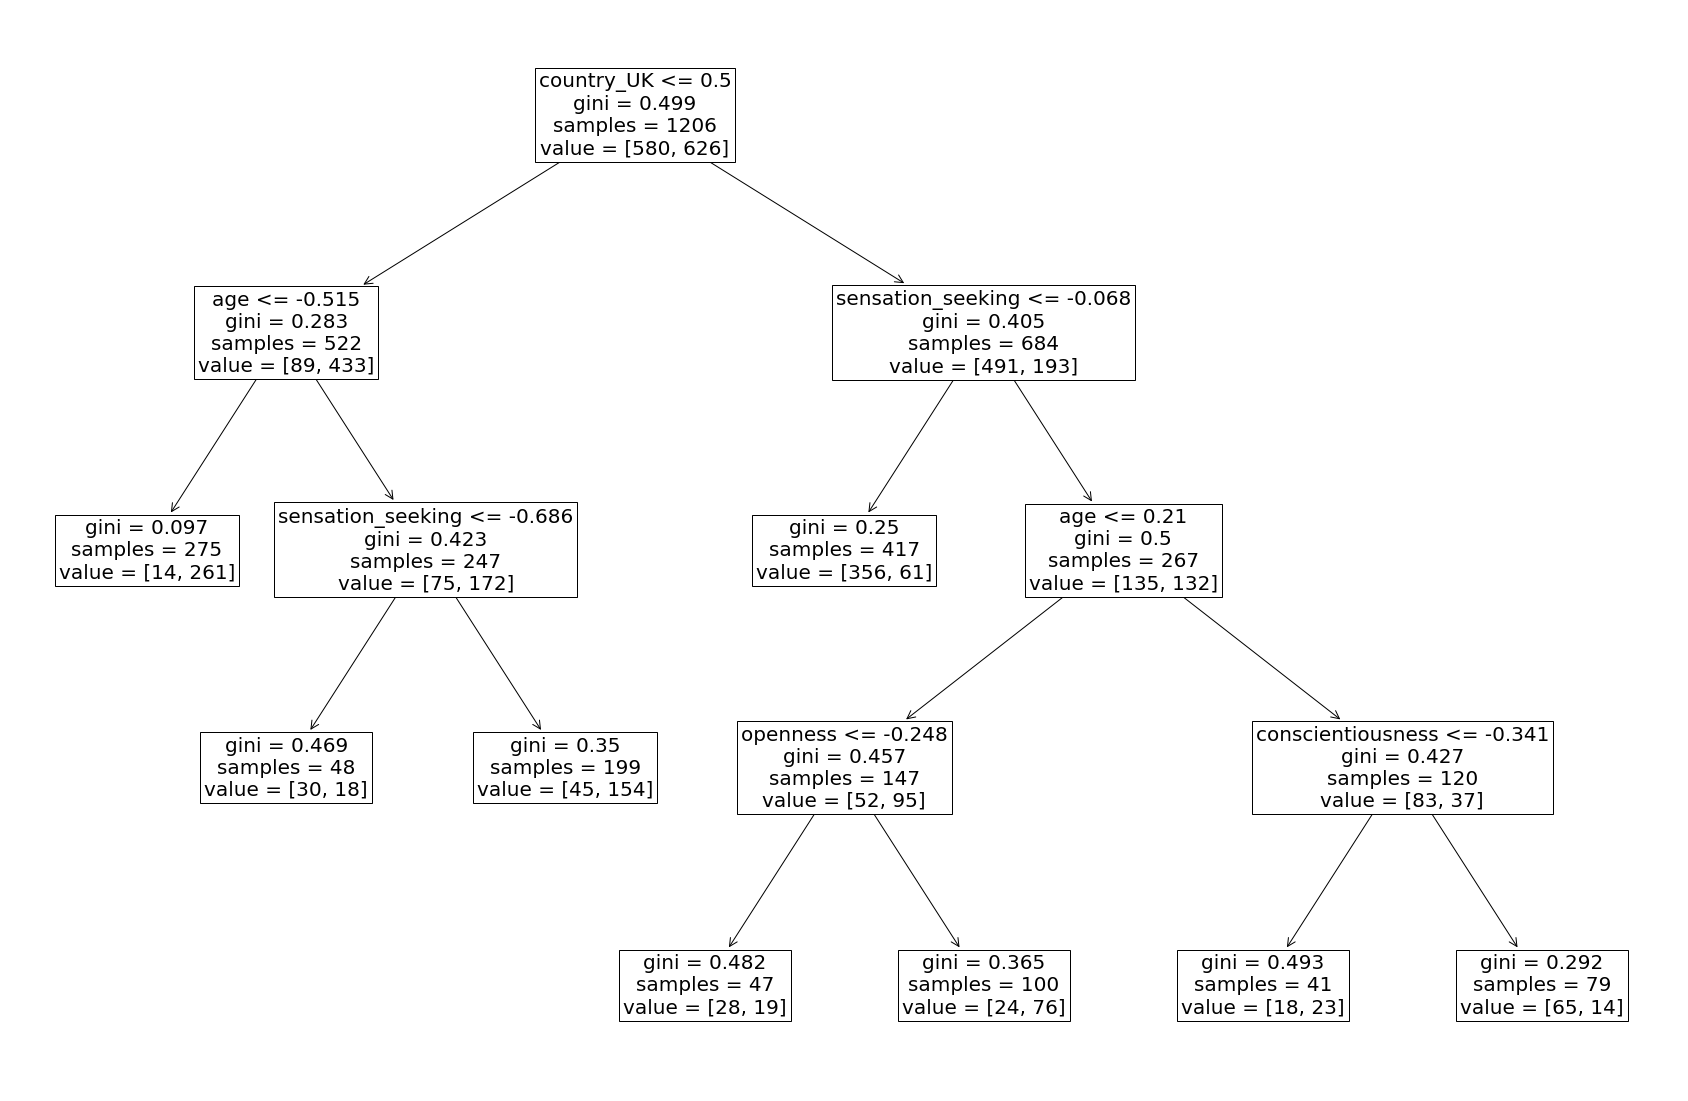

In [151]:
clf = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(30, 20))
tree.plot_tree(clf, fontsize=20, ax = ax, feature_names=X.columns)
pass

In [145]:
score_train = cross_val_score(clf, X_train_valid, y_train_valid, cv=5)
print(score_train.mean(), score_train.std())

0.7990605267210842 0.017848584085204296


In [125]:

poly = PolynomialFeatures(2)
pca = PCA(0.9)

#pipeline = make_pipeline(poly, pca, LogisticRegression())


# train the logistic regression model with cross-validation
#scores = cross_val_score(pipeline, X_train, y_train, cv=5)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
clf = LogisticRegression()

# fit the model on the entire training set
#X_train = pd.DataFrame(poly.fit_transform(X_train))
#pca.fit(X_train)
#X_train = pca.transform(X_train)

clf.fit(X_train, y_train)


# make predictions on the testing set
#X_test = pd.DataFrame(poly.fit_transform(X_test))
#X_test = pca.transform(X_test)
y_pred = clf.predict(X_test)

# evaluate the model's accuracy, balanced accuracy, and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced accuracy: {balanced_accuracy:.2f}")
print(f"ROC AUC score: {roc_auc:.2f}")
print(f"Cross-validation scores: {scores}")
print(f"Cross-validation scores Moyenne {np.mean(scores):.2f}")

# print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Confusion matrix:\n{conf_matrix}\n\nClassification report:\n{class_report}")

Accuracy: 0.80
Balanced accuracy: 0.80
ROC AUC score: 0.80
Cross-validation scores: [0.82231405 0.76763485 0.82572614 0.84232365 0.84232365]
Cross-validation scores Moyenne 0.82
Confusion matrix:
[[141  28]
 [ 48 160]]

Classification report:
              precision    recall  f1-score   support

          -1       0.75      0.83      0.79       169
           1       0.85      0.77      0.81       208

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377



In [33]:
clf.coef_

array([[-0.79159489, -0.31876923, -0.17351716, -0.09644227,  0.66190027,
         0.08798308, -0.47806051, -0.0432694 ,  0.60652635,  0.34777489,
        -0.34815602,  0.55955335,  0.28976609, -0.42906287,  0.51500387,
         0.21638923,  0.1147683 , -1.26679909]])

In [34]:
X.columns

Index(['age', 'education', 'neuroticism', 'extraversion', 'openness',
       'agreeableness', 'conscientiousness', 'impulsiveness',
       'sensation_seeking', 'gender_-0.48246', 'gender_0.48246',
       'country_-0.57009', 'country_-0.46841', 'country_-0.28519',
       'country_-0.09765', 'country_0.21128', 'country_0.24923',
       'country_0.96082'],
      dtype='object')